### Tests for a custom bed

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from glacier_read_data import *

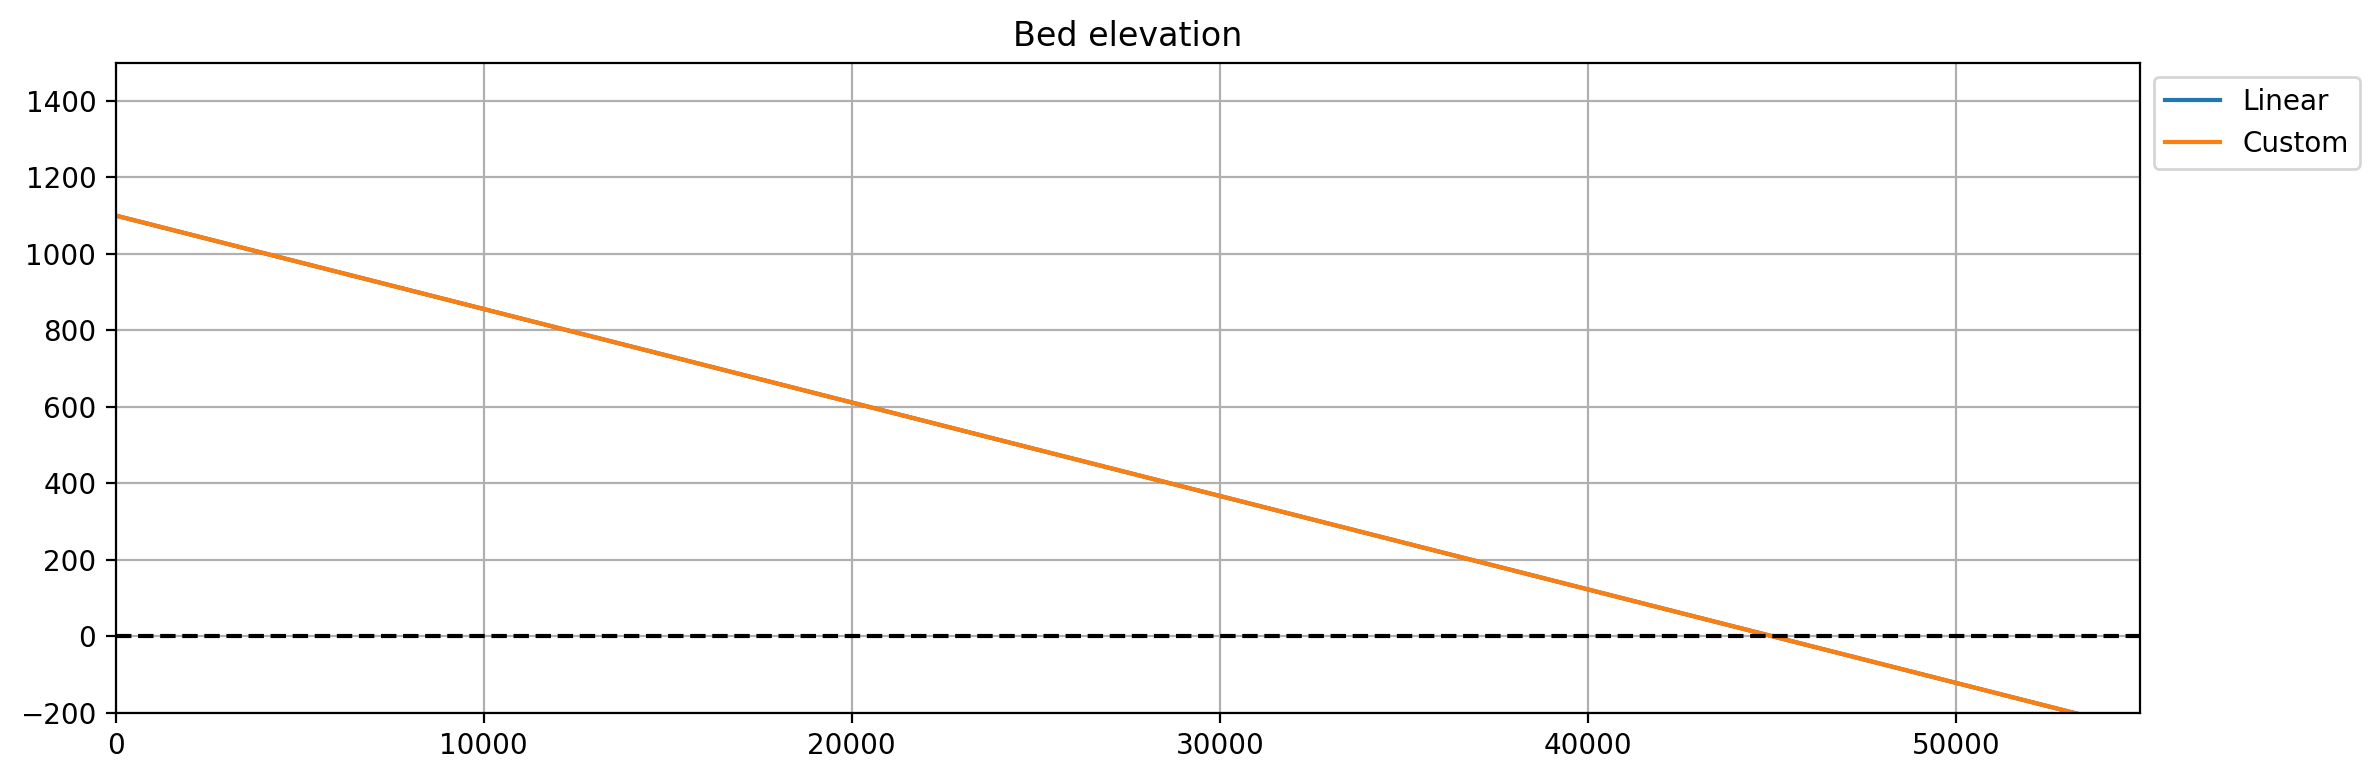

427.7777777777777 427.77777777777766
0.024444444444444446 0.024444444444444442
427.7777777777778 427.7777777777778
0.0 1.7347234759768072e-19


In [2]:
x1 = np.linspace(0., 500000., 100)
y1 = 1100. - 1100./45000. * x1

A = LinearBedModel(b0=1100., s=1100./45000., L0=25000)
B = CustomBedModel(x1, y1, L0=25000)

x = np.linspace(0, 55000)

plt.figure(figsize=(12,4), dpi=200)
plt.plot(x, A.bed(x), label="Linear")
plt.plot(x, B.bed(x), label="Custom")
plt.plot(x, [0]*len(x), "--k")

plt.title("Bed elevation")
plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlim([np.min(x), np.max(x)])
plt.ylim([-200, 1500])
plt.tight_layout()
plt.show()

glaciers = [A,B]

print(A.mean_bed(np.max(x)), B.mean_bed(np.max(x)))
print(A.mean_slope(np.max(x)/2), B.mean_slope(np.max(x)/2))
print(np.mean(A.bed(x)), np.mean(B.bed(x)))
print(A.d_slope_d_L(np.max(x)/2), B.d_slope_d_L(np.max(x)/2))

In [3]:
t = 500.
dt = 0.2

for glacier in glaciers:
    print(glacier)
    glacier.E = 800
    glacier.integrate(dt, t)
    glacier.E = 700
    glacier.integrate(dt, t)
    glacier.E = 800
    glacier.integrate(dt, t)

Minimum Glacier Model for a linear bed.
Minimum Glacier Model for a custom bed.


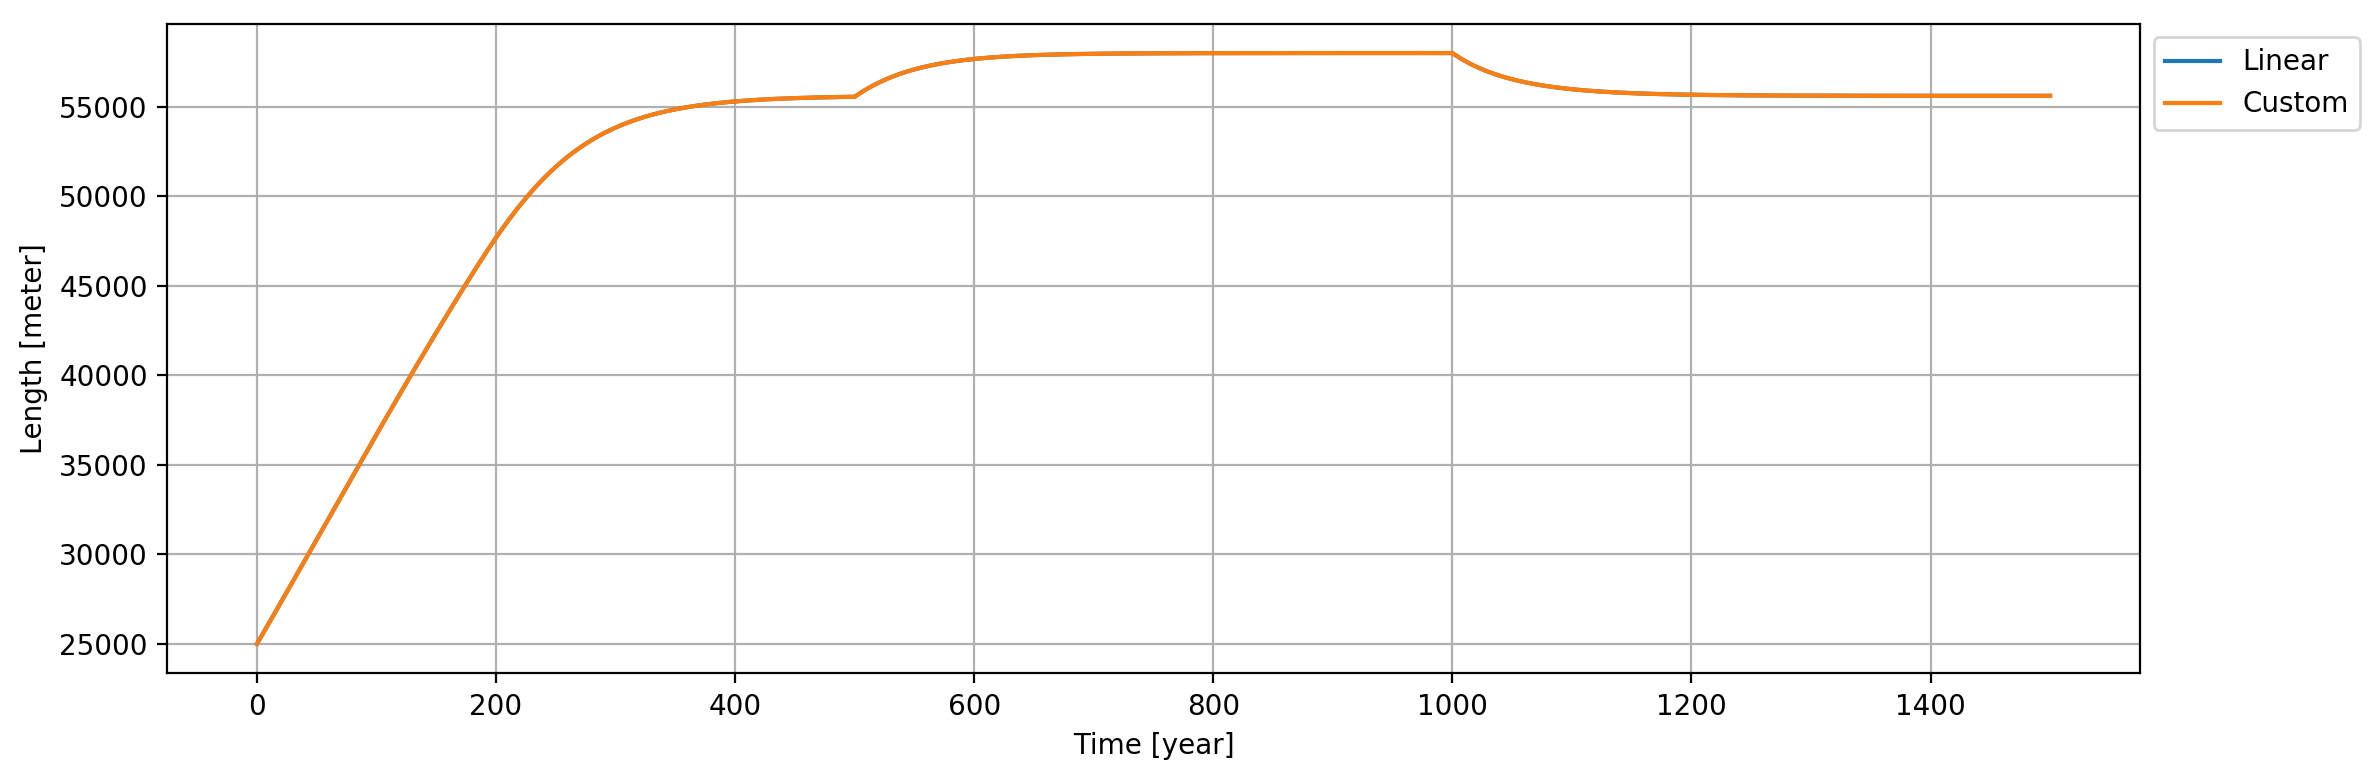

In [7]:
plt.figure(figsize=(12,4), dpi=200)   

plt.plot(A.t, A.L, label="Linear")
plt.plot(B.t, B.L, label="Custom")

plt.grid()
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.xlabel("Time [year]")
plt.ylabel("Length [meter]")
plt.tight_layout()
plt.show()

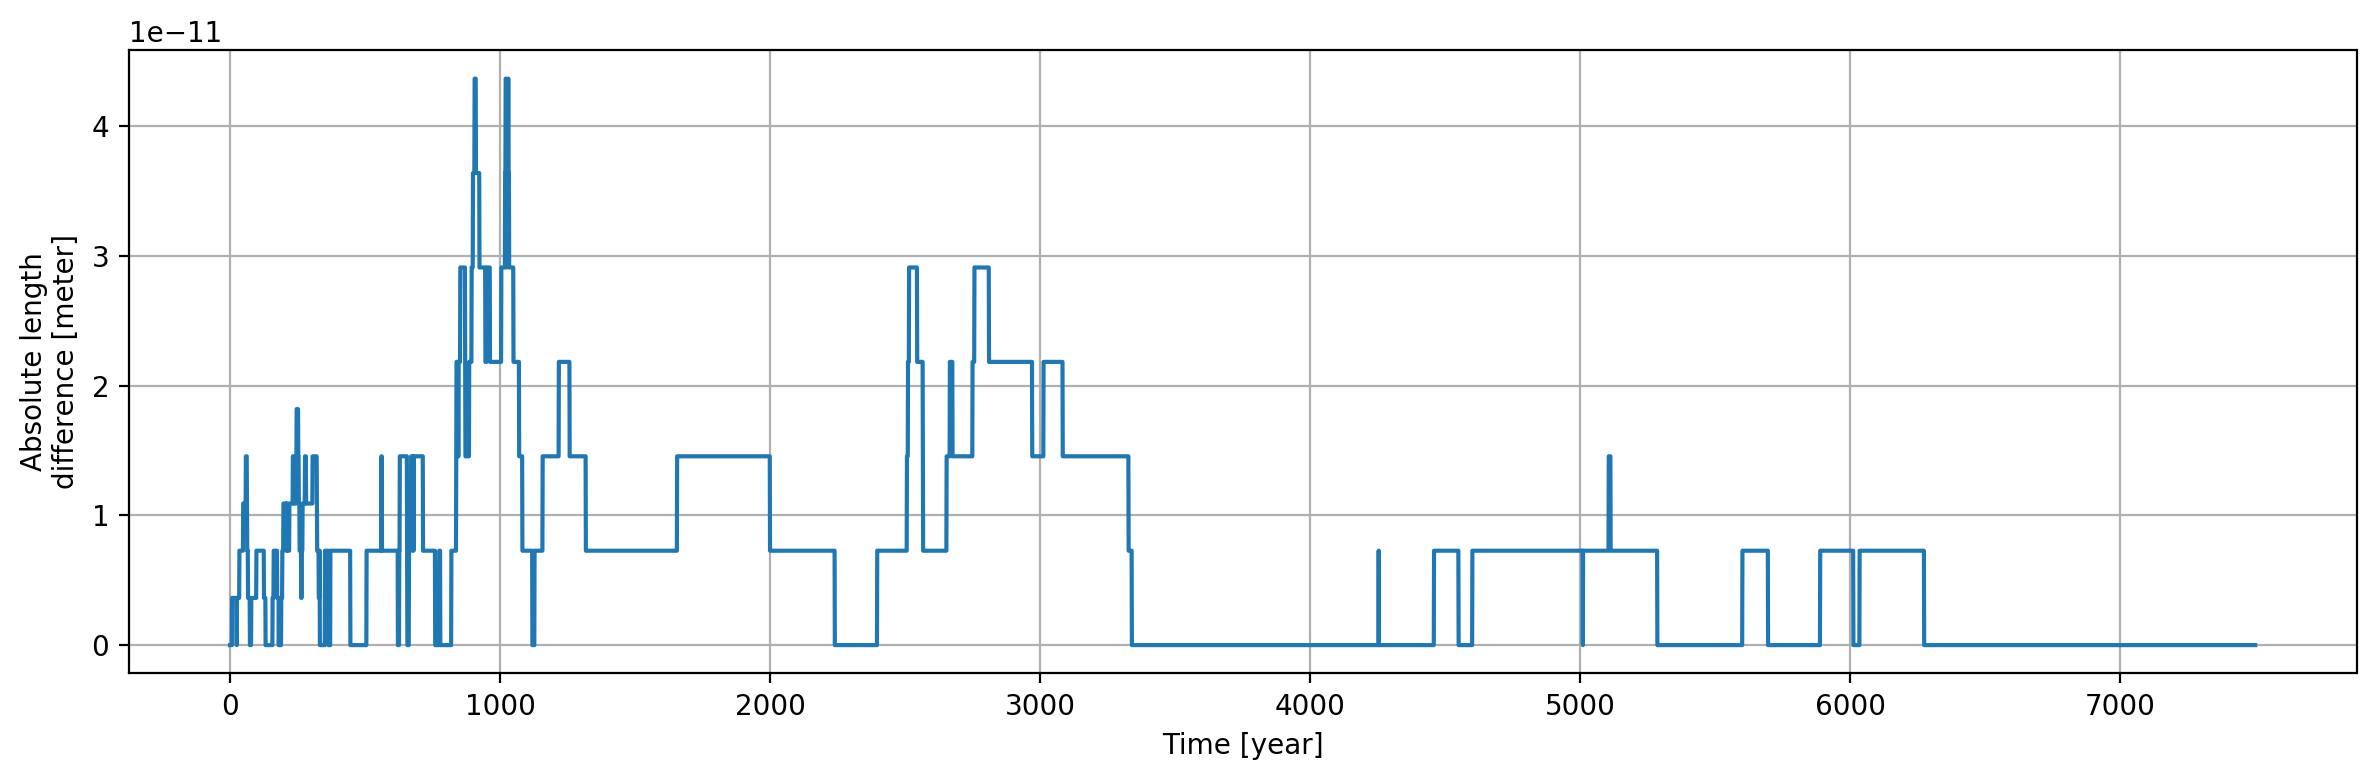

In [10]:
plt.figure(figsize=(12,4), dpi=200)   

plt.plot(np.abs(A.L - B.L))

plt.grid()
plt.xlabel("Time [year]")
plt.ylabel("Absolute length\ndifference [meter]")
plt.tight_layout()
plt.show()